## 자동차 리콜 3개년 분석

## 데이터 출처
-  https://www.data.go.kr/data/3048950/fileData.do

[받은 파일]
- 2020년:자동차리콜현황(2020) v3.0.csv
- 2021년:자동차리콜현황(2021).csv
- 2022년:한국교통안전공단_자동차결함 리콜현황_20221231.csv

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
#데이터 로드
df_22 = pd.read_csv('./data/한국교통안전공단_자동차결함 리콜현황_20221231.csv',encoding='euc_kr')
df_20 = pd.read_csv('./data/자동차리콜현황(2020) v3.0.csv',encoding='euc_kr')
df_21 = pd.read_csv('./data/자동차리콜현황(2021).csv',encoding='euc_kr')

In [10]:
df_20.head(3)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."


In [11]:
df_21.head(3)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,(주) 바이크코리아,Rocket 3 R,2020-02-14,2020-08-31,2021-01-02,"뒷브레이크 에 제동 액을 주입하여 브레이크 압력을 설정하는 제작 공정이 불량하여 ,..."
1,(주) 바이크코리아,Rocket 3 GT,2020-02-13,2020-08-29,2021-01-02,"뒷브레이크 에 제동 액을 주입하여 브레이크 압력을 설정하는 제작 공정이 불량하여 ,..."
2,스텔란티스코리아주식회사,짚그랜드체로키,2010-07-20,2013-01-10,2021-01-04,2014년 및 2015년도에 시행되었던 리콜P54(2014RIV156)와 R09(2...


In [15]:
df_22.head(3)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."


In [63]:
# 데이터 병합
df = pd.concat([df_20,df_21,df_22])

In [19]:
df.head(3)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4656 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       4656 non-null   object
 1   차명        4656 non-null   object
 2   생산기간(부터)  4656 non-null   object
 3   생산기간(까지)  4656 non-null   object
 4   리콜개시일     4656 non-null   object
 5   리콜사유      4656 non-null   object
dtypes: object(6)
memory usage: 254.6+ KB


In [23]:
# 데이터 중복 여부 및 개수 확인
df[df.duplicated(keep=False)]


,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
34,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
82,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
1116,만트럭버스코리아(주),TGS,2016-10-17,2016-10-17,2021-09-01,"EGR 플랩의 내구성 부족으로 인한 EGR 플랩 파손(냉각수 누수, 플랩 파편의 연..."
1120,만트럭버스코리아(주),TGS,2016-10-17,2016-10-17,2021-09-01,"EGR 플랩의 내구성 부족으로 인한 EGR 플랩 파손(냉각수 누수, 플랩 파편의 연..."
1521,비엠더블유코리아(주),BMW 320d,2016-06-20,2020-07-31,2021-11-01,BMW 자체 품질조사 결과 2011년 3월 31일부터 2020년 8월 28일까지 생...
...,...,...,...,...,...,...
790,비엠더블유코리아(주),530d,2016-10-27,2018-09-05,2022-07-06,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
1144,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1145,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1216,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."


In [24]:
# 데이터 중복 처리(삭제)
print("Before:", len(df))
df = df.drop_duplicates()
print("After:", len(df))


Before: 4656
After: 4498


## 1. 제조사별 리콜 현황
* 3년동안 리콜 건수가 가장 많은 제조사는?
* 시각화를 통해 근거 자료 만들기

In [55]:
tmp = df.groupby('제작자').size().sort_values(ascending=False).to_frame('count').head(10)
tmp.head()

,count
제작자,
비엠더블유코리아(주),1660
메르세데스벤츠코리아(주),1108
폭스바겐그룹코리아 주식회사,301
만트럭버스코리아(주),137
현대자동차(주),120


In [35]:
plt.rc('font', family='NanumGothic') #나눔 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False #부호

plt.rcParams['figure.figsize'] = (8, 3)
plt.rcParams['font.size'] = 8

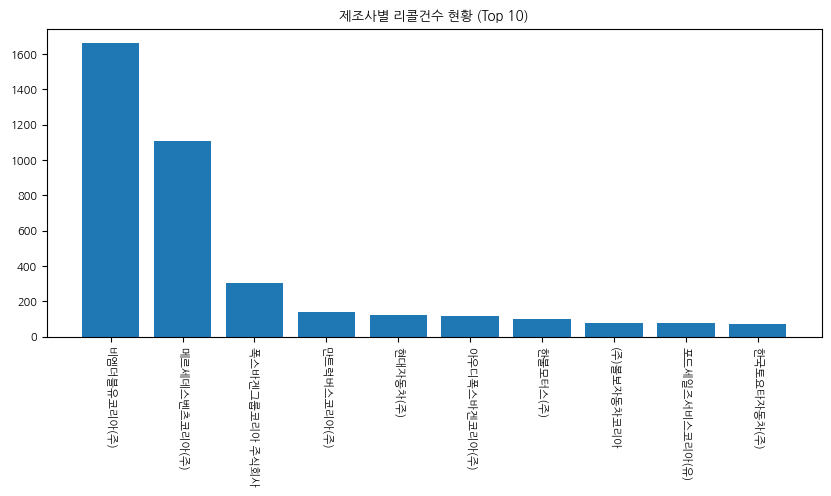

In [57]:
x = tmp.index
y = tmp['count']

plt.figure(figsize=(10,4))   # 스케치북 그리기
plt.bar(x=x,height=y)       # bar 차트에 x, y 값 할당
plt.xticks(rotation=270)    # x축 이름 회전
plt.title('제조사별 리콜건수 현황 (Top 10)')     # 차트 제목 생성
plt.show() 

```
문제: 3년동안 리콜건수가 가장 많은 제조사는?
답: 비엠더블유코리아(주)	

```

## 2.(그나마) 튼튼하게 만드는 기업 vs  Worst 기업 top10

* 출고 년도부터 리콜 개시일 사이의 기간을 사용기간이라고 할때, 
* 이 사용기간이 길면 길수록 그나마 튼튼하게 만들었다고 볼 수 있다. 
* 물론, 여기 리콜현황에 등록되지 않은 제조사가 베스트이겠지만....
* 사용기간의 평균이 가장 높고 낮은 10개 기업 리스트를 알아보자

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4498 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       4498 non-null   object
 1   차명        4498 non-null   object
 2   생산기간(부터)  4498 non-null   object
 3   생산기간(까지)  4498 non-null   object
 4   리콜개시일     4498 non-null   object
 5   리콜사유      4498 non-null   object
dtypes: object(6)
memory usage: 246.0+ KB


In [71]:
df['생산기간(부터)'] = pd.to_datetime(df['생산기간(부터)'])
df['생산기간(까지)'] = pd.to_datetime(df['생산기간(까지)'])
df['리콜개시일'] = pd.to_datetime(df['리콜개시일'])

# 사용기간 컬럼 새로 만들기(파생변수 생성해서)
df['사용기간'] = df['리콜개시일']-df['생산기간(까지)']

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4656 entries, 0 to 1418
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   제작자       4656 non-null   object         
 1   차명        4656 non-null   object         
 2   생산기간(부터)  4656 non-null   datetime64[ns] 
 3   생산기간(까지)  4656 non-null   datetime64[ns] 
 4   리콜개시일     4656 non-null   datetime64[ns] 
 5   리콜사유      4656 non-null   object         
 6   사용기간      4656 non-null   timedelta64[ns]
dtypes: datetime64[ns](3), object(3), timedelta64[ns](1)
memory usage: 291.0+ KB


In [73]:
df.head(3)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,사용기간
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,1469 days
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,1470 days
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",176 days


In [76]:
# 제조사별 사용기간이 가장 긴 순서대로 정렬
tmp = df.groupby('제작자')['사용기간'].mean().sort_values(ascending=False).to_frame('time').head(10)
tmp.head()

,time
제작자,
한신특장,3349 days 00:00:00
한국닛산(주),2501 days 11:04:36.923076928
비엠더블유코리아(주),2022 days 23:43:18.122584192
아이씨피(주),1902 days 00:00:00
(주)다산중공업,1665 days 00:00:00


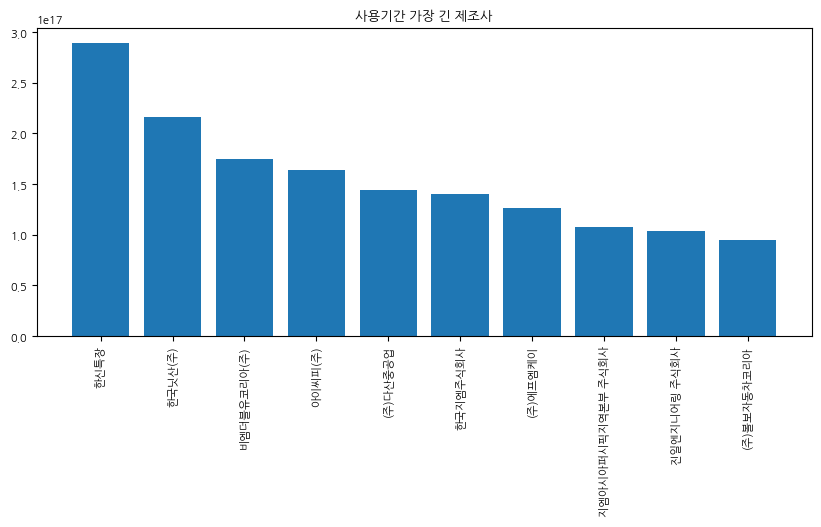

In [81]:
x = tmp.index
y = tmp['time']

plt.figure(figsize=(10,4))   # 스케치북 그리기
plt.bar(x=x,height=y)       # bar 차트에 x, y 값 할당
plt.xticks(rotation=90)    # x축 이름 회전
plt.title('사용기간 가장 긴 제조사')     # 차트 제목 생성
plt.show() 


In [82]:
tmp_1 = df.groupby('제작자')['사용기간'].mean().sort_values().to_frame('time').head(10)
tmp_1.head()

,time
제작자,
폴스타오토모티브코리아 유한회사,22 days 00:00:00
주식회사 케이에스티일렉트릭,113 days 00:00:00
명원아이앤씨(주),128 days 00:00:00
(유)기흥모터스,254 days 22:51:25.714285716
범한자동차 주식회사,261 days 18:00:00


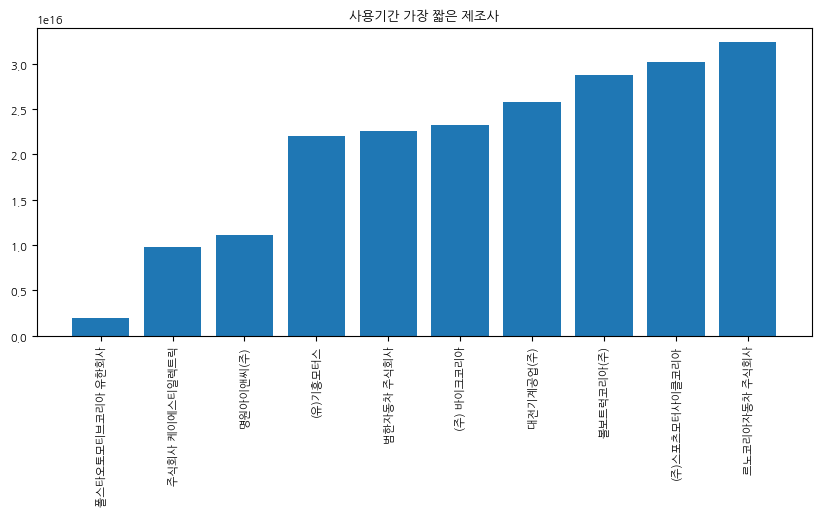

In [83]:
x = tmp_1.index
y = tmp_1['time']

plt.figure(figsize=(10,4))   # 스케치북 그리기
plt.bar(x=x,height=y)       # bar 차트에 x, y 값 할당
plt.xticks(rotation=90)    # x축 이름 회전
plt.title('사용기간 가장 짧은 제조사')     # 차트 제목 생성
plt.show()

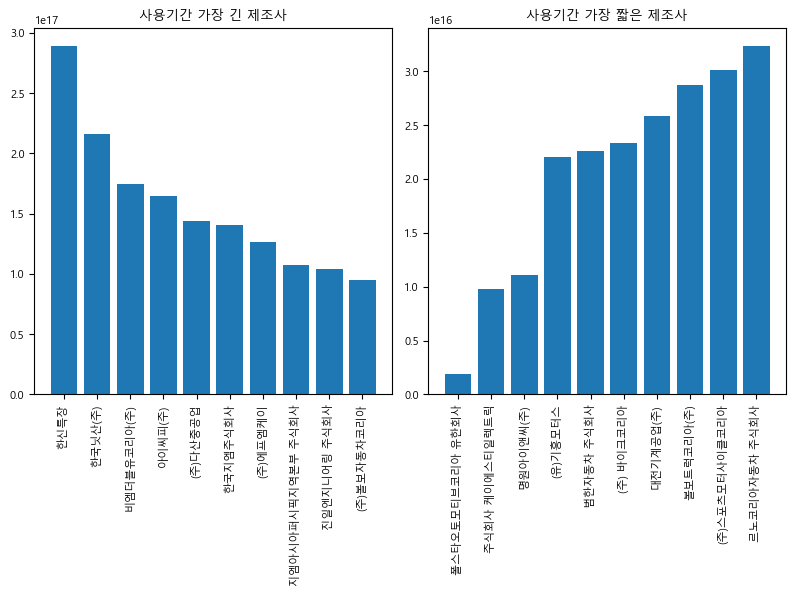

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.rc('font', family = "Malgun Gothic") #한글사용
plt.rcParams['axes.unicode_minus']=False #마이너스 부호 깨짐

plt.subplot(1, 2, 1)                # nrows=2, ncols=1, index=1
x = tmp.index
y = tmp['time']

plt.bar(x=x,height=y)       # bar 차트에 x, y 값 할당
plt.xticks(rotation=90)    # x축 이름 회전
plt.title('사용기간 가장 긴 제조사')     # 차트 제목 생성

plt.subplot(1, 2, 2)                # nrows=2, ncols=1, index=2
x = tmp_1.index
y = tmp_1['time']

plt.bar(x=x,height=y)       # bar 차트에 x, y 값 할당
plt.xticks(rotation=90)    # x축 이름 회전
plt.title('사용기간 가장 짧은 제조사')     # 차트 제목 생성

plt.tight_layout()
plt.show()


```
문제:그나마 튼튼 제조사 top 3는?
답: 한신특장, 한국닛산(주), 비엠더블유코리아(주)	
```

## 3. 리콜이 가장 많은 제조사 1위의 리콜 원인은 ?
* 리콜 대마왕 XXX 기업의 문제의 모델 xxx에 대해 대규모 손해배상청구 소송을 진행하려 한다. 
* 이 회사의 주요 리콜 사유를 알아내고,(워드 클라우드로 제작해서 키워드 추출)
* 해당 사유로 리콜된 최고 문제 모델을 찾아내서
* 소송으로 가즈아~

In [88]:
# 리콜건수가 가장 많은 제조사는?
tmp = df.groupby('제작자').size().sort_values(ascending=False).to_frame('count').head(10)
tmp.head()

,count
제작자,
비엠더블유코리아(주),1811
메르세데스벤츠코리아(주),1109
폭스바겐그룹코리아 주식회사,301
만트럭버스코리아(주),138
현대자동차(주),120


In [89]:
# 리콜 사유는?
df[df['제작자']=='비엠더블유코리아(주)']['리콜사유']


11      2019년 01월 30일부터 2019년 10월 21일까지 생산된 BMW M5, M8...
12      2019년 01월 30일부터 2019년 10월 21일까지 생산된 BMW M5, M8...
34      차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
35      차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
36      차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
                              ...                        
1411    배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1412    배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1413    배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1414    배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415    배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
Name: 리콜사유, Length: 1811, dtype: object

In [92]:
from wordcloud import WordCloud, STOPWORDS

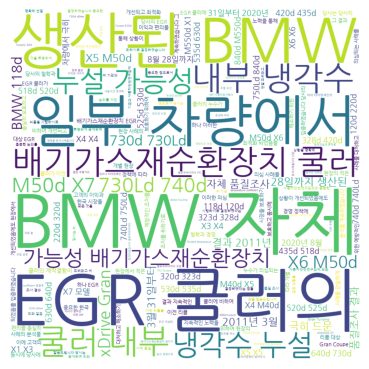

In [95]:
# 워드클라우드를 사용해 키워드 추출

from wordcloud import WordCloud, STOPWORDS
set(STOPWORDS)
spwords = set(['되었습니다','발견','되었습니다.',"수이기는","적은 수이기는","동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당", "있어", "내에",
                "못", '으로", "의한', "위해", '후', '할', '로', '더', '와', '나', '전', '매우', '등', '내에', '을', '함'])

text = ' '.join(df[df['제작자']=='비엠더블유코리아(주)']['리콜사유'].values)
len(text)


font_path = './NanumGothic.ttf'
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path=font_path,
                background_color='white', width=800, height=800)
wc1.generate(text)

plt.figure(figsize=(6, 4))
plt.imshow(wc1)
plt.tight_layout()
plt.axis('off')
plt.show()


In [116]:
# 주요 원인이 포함된 이유 상세 보기
df_1 = df[df['리콜사유'].str.contains('배기가스재순환장치|EGR|냉각수|쿨러의')]
df_1['리콜사유'].head(10)

85        오일필터 하우징 재질 문제로 극히 드문 경우 엔진오일과 냉각수가 섞일 수 있습니다.
93     배기가스재순환장치 냉각기 결함으로 냉각수가 누출될 수 있고, 그 결과 배기가스재순환...
94     배기가스재순환장치 냉각기 결함으로 냉각수가 누출될 수 있고, 그 결과 배기가스재순환...
95     배기가스재순환장치 냉각기 결함으로 냉각수가 누출될 수 있고, 그 결과 배기가스재순환...
96     배기가스재순환장치 냉각기 결함으로 냉각수가 누출될 수 있고, 그 결과 배기가스재순환...
97     배기가스재순환장치 냉각기 결함으로 냉각수가 누출될 수 있고, 그 결과 배기가스재순환...
98     배기가스재순환장치 냉각기 결함으로 냉각수가 누출될 수 있고, 그 결과 배기가스재순환...
99     배기가스재순환장치 냉각기 결함으로 냉각수가 누출될 수 있고, 그 결과 배기가스재순환...
100    배기가스재순환장치 냉각기 결함으로 냉각수가 누출될 수 있고, 그 결과 배기가스재순환...
101    배기가스재순환장치 냉각기 결함으로 냉각수가 누출될 수 있고, 그 결과 배기가스재순환...
Name: 리콜사유, dtype: object

In [109]:
#주요 원인으로 리콜된 가장 나쁜 모델3개는?
df_1.groupby('차명').size().sort_values(ascending=False).to_frame('count').head(3)

,count
차명,
BMW 320d,72
BMW 520d,62
BMW 420d,41


```
리콜 주요 원인은? 배기가스재순환장치, 냉각기의 결함으로 인한 문제가 가장 주요한 리콜 원인이라 판단된다.

그래서, 가장 나쁜 모델은? 비엠더블유코리아(주) 제조사는 2020년부터 2022년 동안 가장 리콜 건수가 많은 제조사이다. 그리고 리콜의 주요 원인과 그로 인해 가장 많이 리콜된 차량을 확인해봤을 때 가장 많이 리콜된 차량은 'BMW 320d' 인 것을 확인할 수 있다.
```